## Project-1 (Binary Counter)
<hr>
Hardware Requirements:<br>
<ul>
    <li>1x Jetson Nano Developer Kit &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp <a style='text-decoration:underline;' href="https://www.amazon.com/NVIDIA-Jetson-Nano-Developer-945-13450-0000-100/dp/B084DSDDLT/ref=asc_df_B084DSDDLT/?tag=hyprod-20&linkCode=df0&hvadid=416652333997&hvpos=&hvnetw=g&hvrand=5305739034639160798&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9020641&hvtargid=pla-893453703291&psc=1&tag=&ref=&adgrpid=100759324064&hvpone=&hvptwo=&hvadid=416652333997&hvpos=&hvnetw=g&hvrand=5305739034639160798&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9020641&hvtargid=pla-893453703291">Amazon</a></li>
    <li>1x DC Adapter (5V 2.5A)</li>
    <li>1x Monitor, 1x Mouse, and 1x Keyboard</li>
    <li>1x HDMI Cable</li>
    <li>1x SD Card with an already booted and configured 'Jetson Nano Developer Kit SD Card' Image &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp <a style='text-decoration:underline;' href='https://developer.nvidia.com/embedded/learn/getting-started-jetson'>Getting Started on Jason Nano</a></li>
    <Li>4x LEDs</Li>
    <li>4x Resistors</li>
    <li>4x Transistors</li>
    <li>1x Breadboard</li>
    <li>Wires (pref. Red, Blue, one onother color)</li>
</ul>
<hr>
Required Liberaries:<br>
<ol>
    <li>GPIO&nbsp&nbsp#To work with Jetson Nano's pins</li>
    <li>time&nbsp&nbsp&nbsp#To create delays</li>
</ol>
<hr>
Other Prerequisites:<br>
<ol>
    <li>Text Editor (pref. Visual Studio Code)</li>
    <li>Some Python programming knowledge</li>
    <ol>
        <li>How to import and work with modules</li>
        <li>Variables and Data Types</li>
        <li>If Statements</li>
        <li>While loop</li>
        <li>For loop</li>
        <li>Functions</li>
        <ul>
            <li>Creaing Functions</li>
            <li>Using built-in functions Ex. bin()</li>
        </ul>
        <li>List Comprehension</li>
        <li>String Formatting</li>
        <li>Type Conversoin</li>
    </ol>
</ol>

## Step 1:
Getting The board ready:
<img src="img/circuit.png">
<img src="img/1.jpeg">

Closeup Images:
<div style="width:100%;">
    <img src="img/2.jpeg" width="49%">
    <img src="img/3.jpeg" width="49%">
</div>

## Step 2:
Connecting the board to Jetson Nano

<img src="img/4.jpeg">

## Step 3:
Writting the Code:

### Importing Dependencies

In [ ]:
import RPi.GPIO as GPIO
import time

### Set the GPIO mode to BCM

In [ ]:
GPIO.setmode(GPIO.BCM)

### Define GPIO pins for each LED

In [ ]:
LED_PINS = [18, 23, 24, 25]
LED_PINS_DICT = {0:18,1:23,2:24,3:25}

### Set all LED pins as output

In [ ]:
for pin in LED_PINS:
    GPIO.setup(pin, GPIO.OUT)

### pin_state function gets the pin's value and return their state in a list [HIGH/LOW]

In [ ]:
def pin_state(p_arr):
    return ['GPIO.HIGH' if int(i) else 'GPIO.LOW' for i in p_arr]

### Main

In [ ]:
way = True #This is a flag and shows weather we are counting UP or counting Down
i = 0      #The current number             
pins_array = []  #the binary format of the current number will get stored here. each number takes one cell. Ex: 11 -> [1,0,1,1]
while True: #Creates an infinite loop so we can count up and down continuously
    pins_array = [j for j in ('0'*(4-len(bin(i)[2:])))+bin(i)[2:]]  #Converting and storying the binary form of the current number in pins_array

    #Going throught the pins and turning them on or off depending on their state
    for n,state in enumerate(pin_state(pins_array)):
        exec(f'GPIO.output({LED_PINS_DICT[n]}, {state})')
    #Uncomment the next two lines to see the pin's state in the console
    #     print(LED_PINS_DICT[n], state, end = " | ")
    # print()

    #ioncreases the current number if we are counting up or decreases one from it if we are counting down
    if way:  
        i+=1
    else:
        i-=1
        
    #Chekcing whether we have reached the end of counting up (15) or down (0) using the flag 'way' we defined earlier
    if i == 15 and way==True:
        way = False
        i = 15
    elif i == 0 and way == False:
        way = True
        i = 0
    time.sleep(1)

In [3]:
from IPython.display import YouTubeVideo

## Step 4:
Running the code:
You should see the exact results on your board. If NOT, check the board and connections.

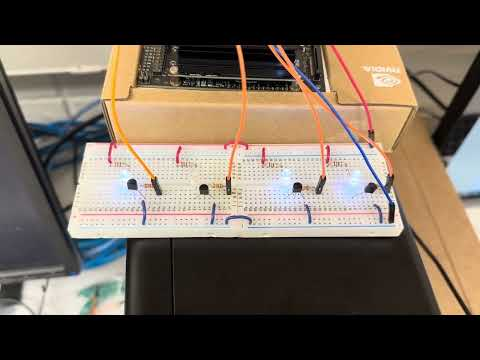

In [13]:
id = "DnU9cB7Kbes"
YouTubeVideo(id=id, width="", height="")

<iframe width="560" height="315" src="https://www.youtube.com/embed/DnU9cB7Kbes" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>